<a href="https://colab.research.google.com/github/hfwalvir/Dissertation/blob/main/Network_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALIZATION FOR BUSINESS 1 (ACE NURSE SCHOOL) AND WITHOUT IT'S SUPPLIER CONSENT :**

<ipython-input-11-41e4cc71a0d5>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


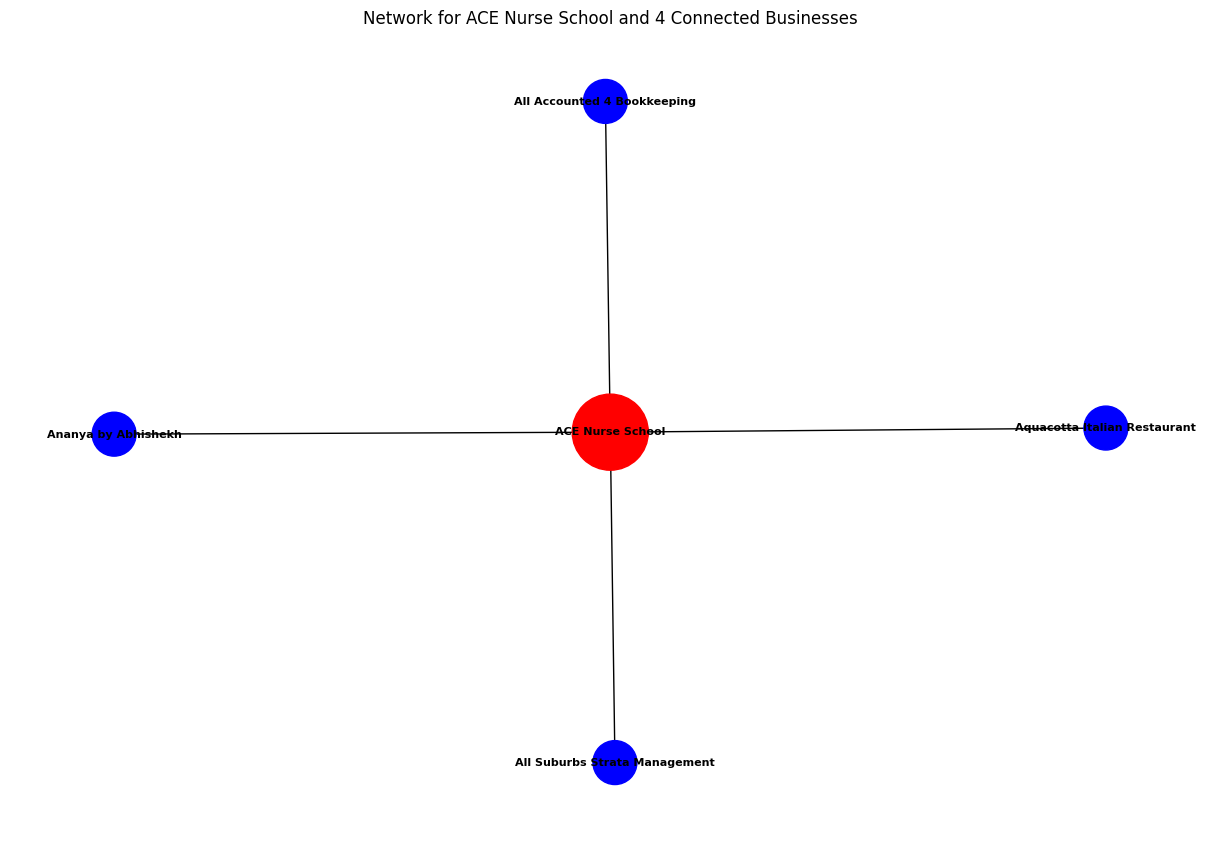

Network for ACE Nurse School:
Number of nodes: 5
Number of edges: 4

Connected businesses:
- All Accounted 4 Bookkeeping
- All Suburbs Strata Management
- Ananya by Abhishekh
- Aquacotta Italian Restaurant


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/sample_data/business-directory (1).csv')

# Select relevant columns and remove rows with missing values
df = df[['What is your business trading name?', 'Postcode']].dropna()

# Function to create a simple network
def create_simple_network(df, company_name, num_connections=4):
    G = nx.Graph()

    # Checking if the company exists in the dataframe
    if company_name not in df['What is your business trading name?'].values:
        print(f"Error: '{company_name}' not found in the dataset.")
        return G

    # Add the main company
    G.add_node(company_name, color='red', size=3000)

    # Find the company's postcode
    company_postcode = df[df['What is your business trading name?'] == company_name]['Postcode'].values[0]

    # Find nearby businesses (based on postcode proximity)
    df['postcode_diff'] = abs(df['Postcode'] - company_postcode)
    nearby_businesses = df[df['What is your business trading name?'] != company_name].nsmallest(num_connections, 'postcode_diff')

    # Add nearby businesses and connect them to the main company
    for _, business in nearby_businesses.iterrows():
        business_name = business['What is your business trading name?']
        G.add_node(business_name, color='blue', size=1000)
        G.add_edge(company_name, business_name)

    return G

# Choosing a company name that actually exists in the dataset
company_x = df['What is your business trading name?'].iloc[0]  # Selecting the first company name for example
G = create_simple_network(df, company_x)

# Visualization (only if the graph is not empty)
if G.number_of_nodes() > 0:
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    colors = [G.nodes[node]['color'] for node in G.nodes()]
    sizes = [G.nodes[node]['size'] for node in G.nodes()]

    nx.draw(G, pos, node_color=colors, node_size=sizes, with_labels=True, font_size=8, font_weight='bold')
    plt.title(f"Network for {company_x} and 4 Connected Businesses")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Print network information
    print(f"Network for {company_x}:")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print("\nConnected businesses:")
    for node in G.nodes():
        if node != company_x:
            print(f"- {node}")
else:
    print("No network created. Please choose a valid company name.")

# **VISUALIZATION FOR BUSINESS 1 (ACE NURSE SCHOOL) AND WITH IT'S SUPPLIER’S CONSENT :**

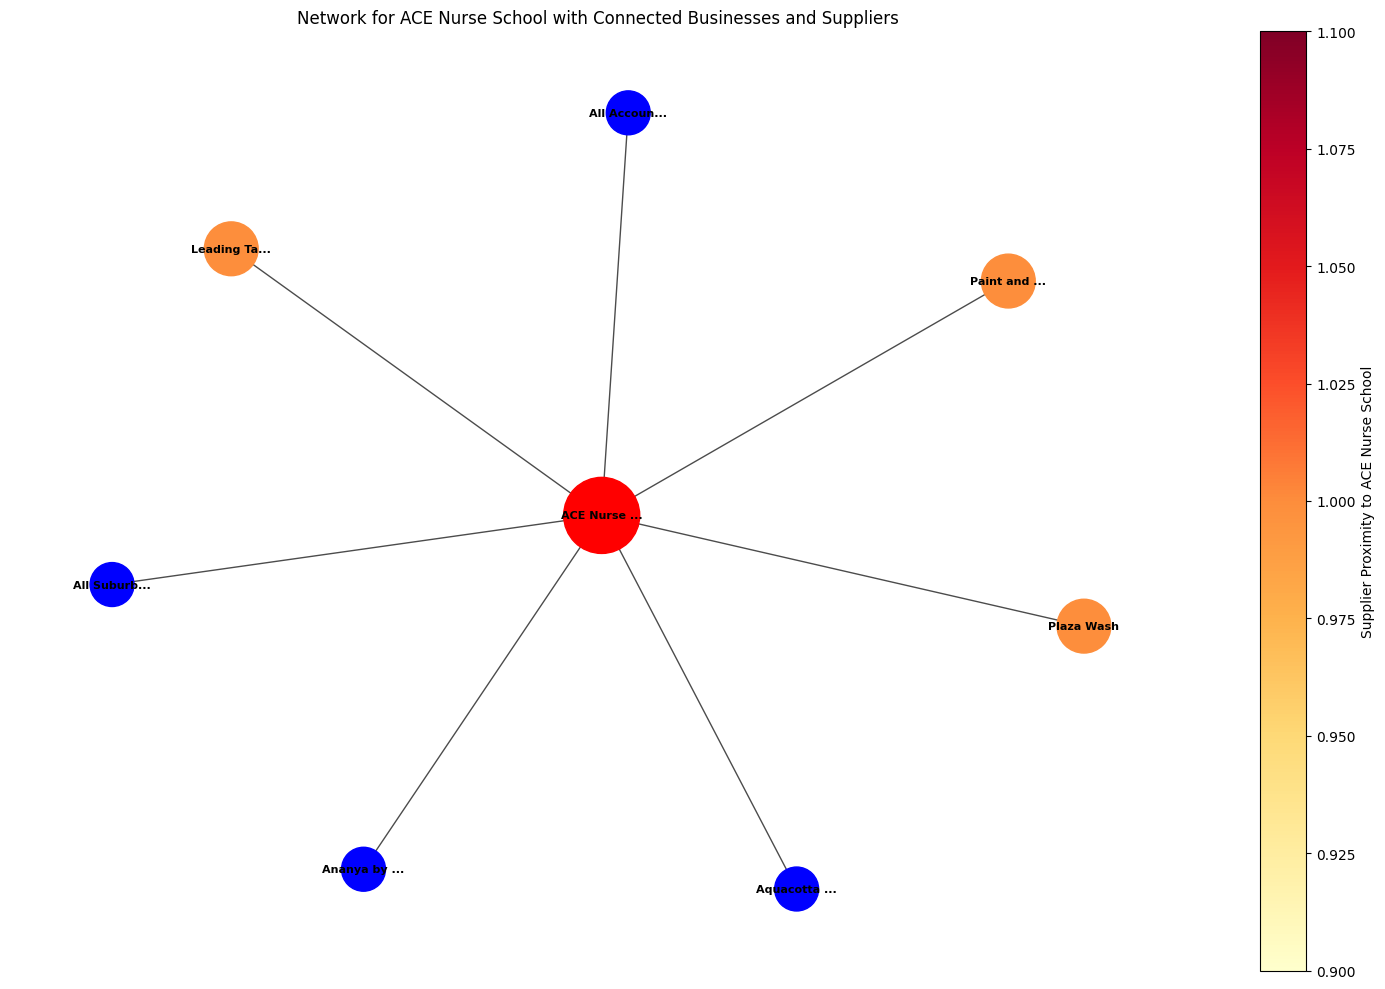

Network for ACE Nurse School:
Number of nodes: 8
Number of edges: 7

Connected businesses and suppliers:
- All Accounted 4 Bookkeeping (Connected Business): Proximity = 1.00
- All Suburbs Strata Management (Connected Business): Proximity = 1.00
- Ananya by Abhishekh (Connected Business): Proximity = 1.00
- Aquacotta Italian Restaurant (Connected Business): Proximity = 1.00
- Plaza Wash (Supplier): Proximity = 1.00
- Paint and Sip Studios (Supplier): Proximity = 1.00
- Leading Tailored Cafe (Supplier): Proximity = 1.00


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/sample_data/business-directory (1).csv')

# Select relevant columns and remove rows with missing values
df = df[['What is your business trading name?', 'Postcode']].dropna()

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create a network for ACE Nurse School with random suppliers
def create_ace_nurse_school_network(df, num_suppliers=3):
    G = nx.Graph()

    # Add ACE Nurse School as the main node
    main_company = "ACE Nurse School"
    main_postcode = df[df['What is your business trading name?'] == main_company]['Postcode'].values[0]
    G.add_node(main_company, color='red', size=3000, postcode=main_postcode, proximity=1.0)

    # Add connected businesses
    connected_businesses = [
        "All Accounted 4 Bookkeeping",
        "All Suburbs Strata Management",
        "Ananya by Abhishekh",
        "Aquacotta Italian Restaurant"
    ]

    for business in connected_businesses:
        postcode = df[df['What is your business trading name?'] == business]['Postcode'].values[0]
        proximity = calculate_proximity(main_postcode, postcode)
        G.add_node(business, color='blue', size=1000, postcode=postcode, proximity=proximity)
        G.add_edge(main_company, business, weight=proximity)

    # Add random suppliers
    other_businesses = df[~df['What is your business trading name?'].isin([main_company] + connected_businesses)]
    suppliers = other_businesses.sample(num_suppliers)

    for _, supplier in suppliers.iterrows():
        name = supplier['What is your business trading name?']
        postcode = supplier['Postcode']
        proximity = calculate_proximity(main_postcode, postcode)
        G.add_node(name, color='supplier', size=1500, postcode=postcode, proximity=proximity)
        G.add_edge(main_company, name, weight=proximity)

    return G

# Create the network
G = create_ace_nurse_school_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_proximities = []

for node in G.nodes():
    if G.nodes[node]['color'] == 'red':
        node_colors.append('red')
    elif G.nodes[node]['color'] == 'supplier':
        node_colors.append(G.nodes[node]['proximity'])
        supplier_proximities.append(G.nodes[node]['proximity'])
    else:
        node_colors.append('blue')
    node_sizes.append(G.nodes[node]['size'])

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if G.nodes[n]['color'] != 'supplier'],
                       node_color=[c for c in node_colors if c in ['red', 'blue']],
                       node_size=[s for n, s in zip(G.nodes(), node_sizes) if G.nodes[n]['color'] != 'supplier'])

# Draw supplier nodes
supplier_nodes = nx.draw_networkx_nodes(G, pos,
                                        nodelist=[n for n in G.nodes() if G.nodes[n]['color'] == 'supplier'],
                                        node_color=[c for c in node_colors if c not in ['red', 'blue']],
                                        node_size=[s for n, s in zip(G.nodes(), node_sizes) if G.nodes[n]['color'] == 'supplier'],
                                        cmap=plt.cm.YlOrRd)

nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.7)

# Add labels
labels = {node: node[:10] + '...' if len(node) > 10 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for ACE Nurse School with Connected Businesses and Suppliers")
plt.axis('off')

# Add color bar only for suppliers
if supplier_nodes is not None:
    plt.colorbar(supplier_nodes, label='Supplier Proximity to ACE Nurse School')

plt.tight_layout()
plt.show()

# Print network information
print("Network for ACE Nurse School:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses and suppliers:")
for node in G.nodes():
    if node != "ACE Nurse School":
        node_type = "Supplier" if G.nodes[node]['color'] == 'supplier' else "Connected Business"
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")


# **ANANYA'S CONNECTIONS WITHOUT IT'S SUPPLIER'S CONSENT**

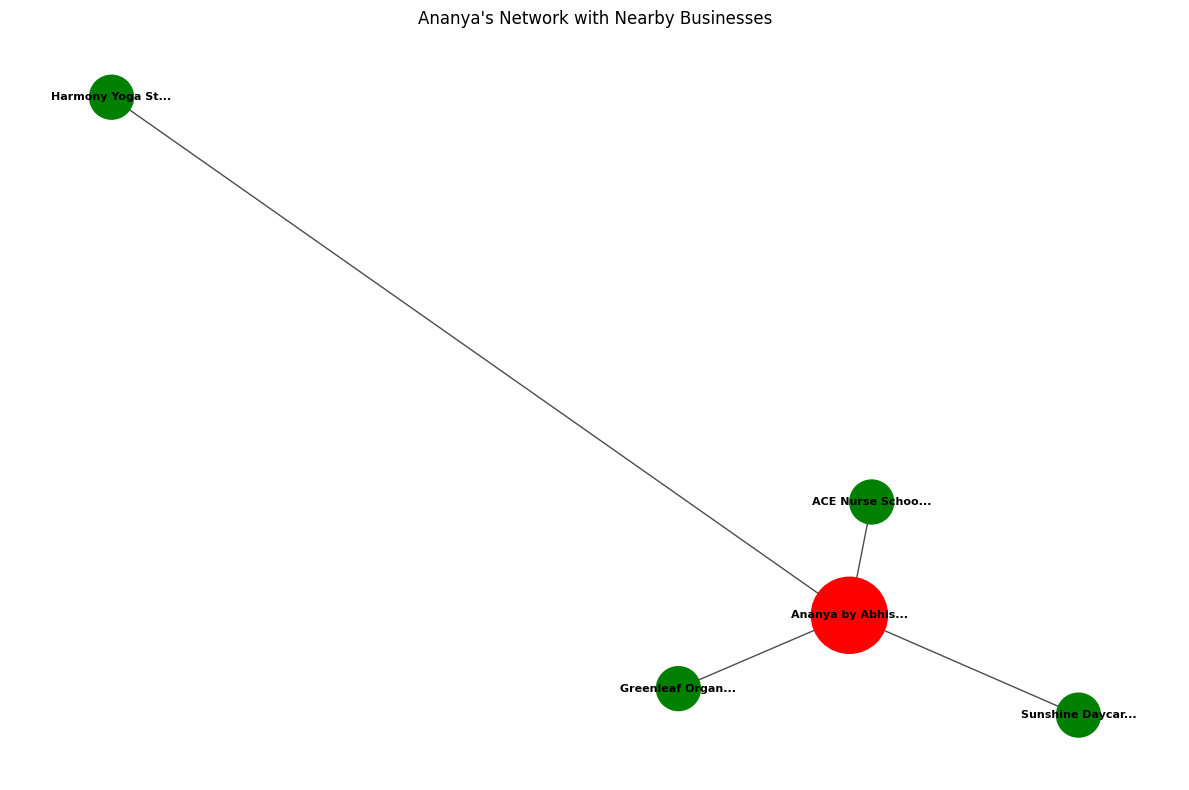

Ananya's Network:
Number of nodes: 5
Number of edges: 4

Connected businesses:
- ACE Nurse School (Connected Business)
- Greenleaf Organic Cafe (Connected Business)
- Sunshine Daycare Center (Connected Business)
- Harmony Yoga Studio (Connected Business)


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'ACE Nurse School',
        'Greenleaf Organic Cafe',
        'Sunshine Daycare Center',
        'Harmony Yoga Studio'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create Ananya's network with hypothetical nodes
def create_ananya_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    ananya_postcode = df[df['Business Name'] == ananya]['Postcode'].values[0]
    G.add_node(ananya, color='red', size=3000, postcode=ananya_postcode)

    # Hypothetical connections
    connections = [
        'ACE Nurse School',
        'Greenleaf Organic Cafe',
        'Sunshine Daycare Center',
        'Harmony Yoga Studio'
    ]

    # Add connections
    for business in connections:
        postcode = df[df['Business Name'] == business]['Postcode'].values[0]
        proximity = calculate_proximity(ananya_postcode, postcode)
        G.add_node(business, color='green', size=1000, postcode=postcode, proximity=proximity)
        G.add_edge(ananya, business, weight=proximity)

    return G

# Create the network
G = create_ananya_network(df)

# Prepare node colors and sizes for visualization
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
node_sizes = [G.nodes[node]['size'] for node in G.nodes()]

# Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Ananya's Network with Nearby Businesses")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print network information
print("Ananya's Network:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses:")
for node in G.nodes():
    if node != "Ananya by Abhishekh":
        print(f"- {node} (Connected Business)")


# **BUSINESS 2 (ANANYA BY ABHISHEK’S NETWORK) WITH IT’S SUPPLIER’S CONSENT**

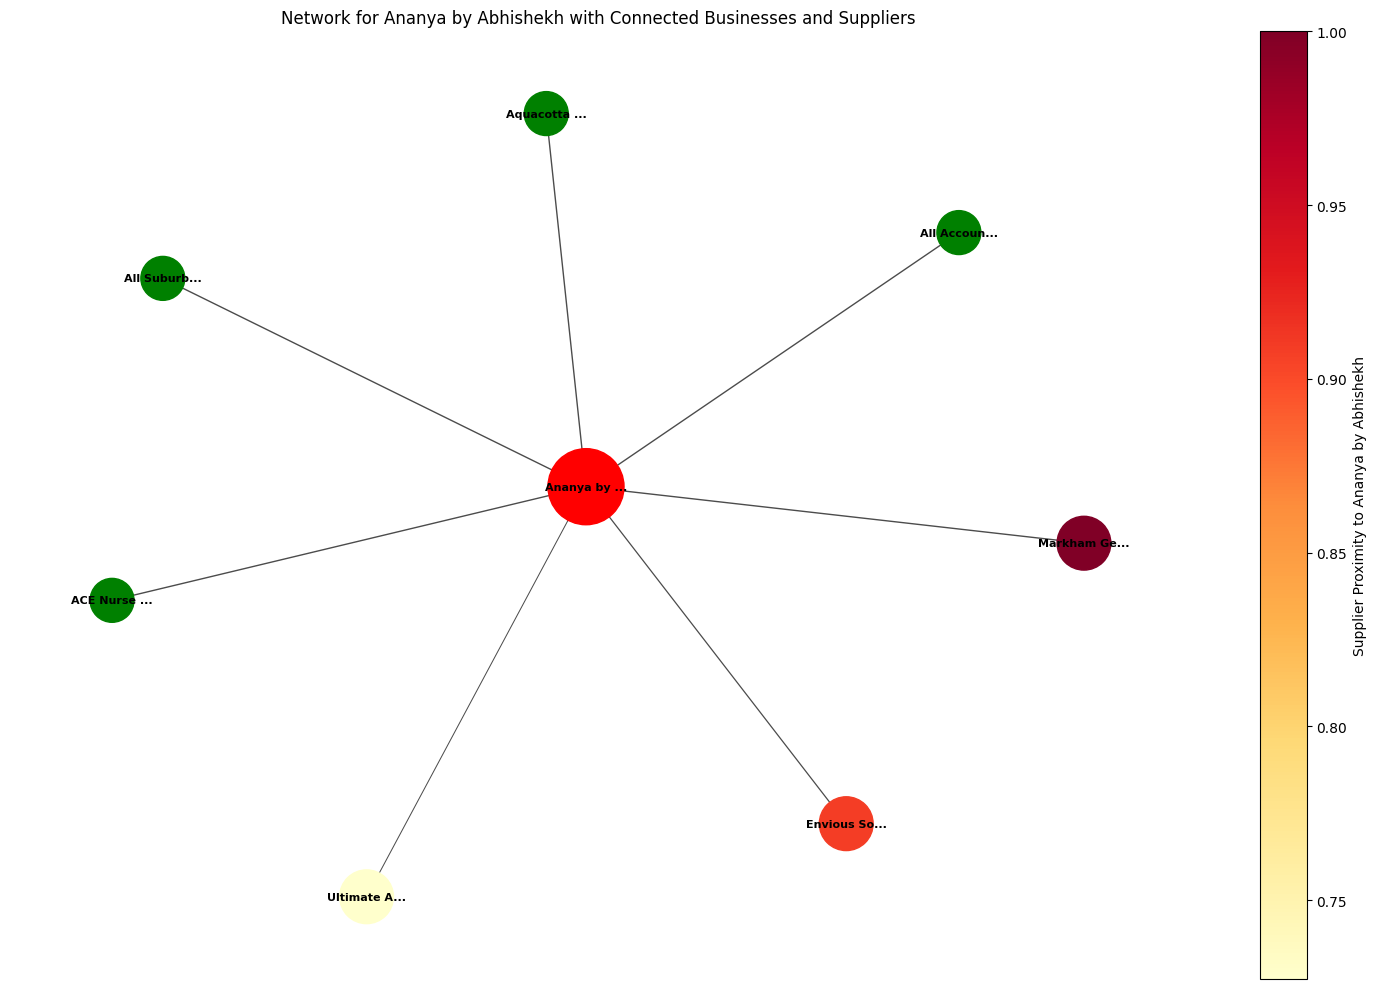

Network for Ananya by Abhishekh:
Number of nodes: 8
Number of edges: 7

Connected businesses and suppliers:
- ACE Nurse School (Connected Business): Proximity = 1.00
- All Accounted 4 Bookkeeping (Connected Business): Proximity = 1.00
- All Suburbs Strata Management (Connected Business): Proximity = 1.00
- Aquacotta Italian Restaurant (Connected Business): Proximity = 1.00
- Ultimate Arbor Solutions (Supplier): Proximity = 0.73
- Envious Solutions (Supplier): Proximity = 0.91
- Markham Geikie Farrugia (Supplier): Proximity = 1.00


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np

# Read the CSV file
df = pd.read_csv('/content/sample_data/business-directory (1).csv')

# Select relevant columns and remove rows with missing values
df = df[['What is your business trading name?', 'Postcode']].dropna()

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create a network for Ananya by Abhishekh with random suppliers
def create_ananya_network(df, num_suppliers=3):
    G = nx.Graph()

    # Add Ananya by Abhishekh as the main node
    main_company = "Ananya by Abhishekh"
    main_postcode = df[df['What is your business trading name?'] == main_company]['Postcode'].values[0]
    G.add_node(main_company, color='red', size=3000, postcode=main_postcode, proximity=1.0)

    # Add connected businesses
    connected_businesses = [
        "ACE Nurse School",
        "All Accounted 4 Bookkeeping",
        "All Suburbs Strata Management",
        "Aquacotta Italian Restaurant"
    ]

    for business in connected_businesses:
        postcode = df[df['What is your business trading name?'] == business]['Postcode'].values[0]
        proximity = calculate_proximity(main_postcode, postcode)
        G.add_node(business, color='green', size=1000, postcode=postcode, proximity=proximity)
        G.add_edge(main_company, business, weight=proximity)

    # Add random suppliers
    other_businesses = df[~df['What is your business trading name?'].isin([main_company] + connected_businesses)]
    suppliers = other_businesses.sample(num_suppliers)

    for _, supplier in suppliers.iterrows():
        name = supplier['What is your business trading name?']
        postcode = supplier['Postcode']
        proximity = calculate_proximity(main_postcode, postcode)
        G.add_node(name, color='supplier', size=1500, postcode=postcode, proximity=proximity)
        G.add_edge(main_company, name, weight=proximity)

    return G

# Create the network
G = create_ananya_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_proximities = []

for node in G.nodes():
    if G.nodes[node]['color'] == 'red':
        node_colors.append('red')
    elif G.nodes[node]['color'] == 'supplier':
        node_colors.append(G.nodes[node]['proximity'])
        supplier_proximities.append(G.nodes[node]['proximity'])
    else:
        node_colors.append('green')
    node_sizes.append(G.nodes[node]['size'])

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if G.nodes[n]['color'] != 'supplier'],
                       node_color=[c for c in node_colors if c in ['red', 'green']],
                       node_size=[s for n, s in zip(G.nodes(), node_sizes) if G.nodes[n]['color'] != 'supplier'])

# Draw supplier nodes
supplier_nodes = nx.draw_networkx_nodes(G, pos,
                                        nodelist=[n for n in G.nodes() if G.nodes[n]['color'] == 'supplier'],
                                        node_color=[c for c in node_colors if c not in ['red', 'green']],
                                        node_size=[s for n, s in zip(G.nodes(), node_sizes) if G.nodes[n]['color'] == 'supplier'],
                                        cmap=plt.cm.YlOrRd)

nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.7)

# Add labels
labels = {node: node[:10] + '...' if len(node) > 10 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh with Connected Businesses and Suppliers")
plt.axis('off')

# Add color bar only for suppliers
if supplier_nodes is not None:
    plt.colorbar(supplier_nodes, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Network for Ananya by Abhishekh:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses and suppliers:")
for node in G.nodes():
    if node != "Ananya by Abhishekh":
        node_type = "Supplier" if G.nodes[node]['color'] == 'supplier' else "Connected Business"
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")


# **Ananya by Abhishekh's gets consent to see ACE Nurse School's connection - All Accounted 4 Bookkeeping**

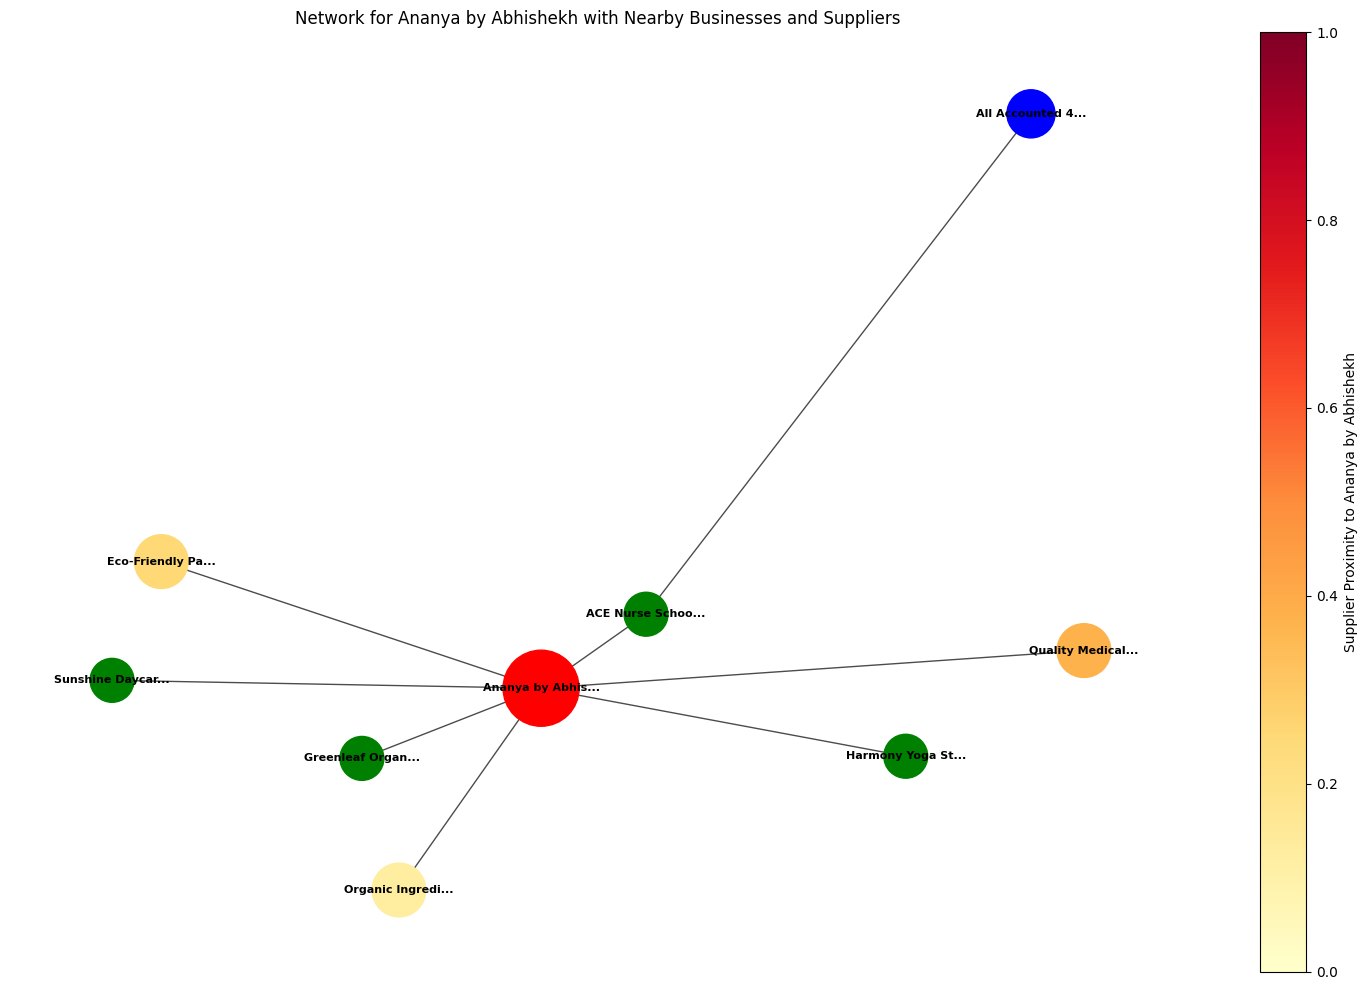

Ananya's Network:
Number of nodes: 9
Number of edges: 8

Connected businesses and suppliers:
- ACE Nurse School (Connected): Proximity = 0.88
- Greenleaf Organic Cafe (Connected): Proximity = 0.75
- Sunshine Daycare Center (Connected): Proximity = 0.62
- Harmony Yoga Studio (Connected): Proximity = 0.50
- Quality Medical Supplies (Supplier): Proximity = 0.38
- Eco-Friendly Packaging Co. (Supplier): Proximity = 0.25
- Organic Ingredients Wholesaler (Supplier): Proximity = 0.12
- All Accounted 4 Bookkeeping (ACE_Connection): Proximity = 0.00


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

# Create a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'ACE Nurse School',
        'Greenleaf Organic Cafe',
        'Sunshine Daycare Center',
        'Harmony Yoga Studio',
        'Quality Medical Supplies',
        'Eco-Friendly Packaging Co.',
        'Organic Ingredients Wholesaler',
        'All Accounted 4 Bookkeeping'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008],
    'Type': ['Main', 'Connected', 'Connected', 'Connected', 'Connected', 'Supplier', 'Supplier', 'Supplier', 'ACE_Connection']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create Ananya's network with hypothetical nodes and suppliers
def create_ananya_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    ananya_postcode = df[df['Business Name'] == ananya]['Postcode'].values[0]
    G.add_node(ananya, color='red', size=3000, postcode=ananya_postcode)

    # Add connections and suppliers
    for _, business in df[df['Business Name'] != ananya].iterrows():
        name = business['Business Name']
        postcode = business['Postcode']
        biz_type = business['Type']
        proximity = calculate_proximity(ananya_postcode, postcode)

        if biz_type == 'Connected':
            color = 'green'
            size = 1000
            G.add_edge(ananya, name, weight=proximity)
        elif biz_type == 'Supplier':
            color = 'supplier'
            size = 1500
            G.add_edge(ananya, name, weight=proximity)
        elif biz_type == 'ACE_Connection':
            color = 'blue'
            size = 1200
            G.add_edge('ACE Nurse School', name, weight=proximity)

        G.add_node(name, color=color, size=size, postcode=postcode, proximity=proximity, type=biz_type)

    return G

# Create the network
G = create_ananya_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_nodes = []
supplier_colors = []

for node in G.nodes():
    if G.nodes[node]['color'] == 'red':
        node_colors.append('red')
    elif G.nodes[node]['color'] == 'blue':
        node_colors.append('blue')
    elif G.nodes[node]['color'] == 'supplier':
        supplier_nodes.append(node)
        supplier_colors.append(G.nodes[node]['proximity'])
    else:
        node_colors.append('green')
    node_sizes.append(G.nodes[node]['size'])

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n not in supplier_nodes],
                       node_color=node_colors,
                       node_size=[G.nodes[n]['size'] for n in G.nodes() if n not in supplier_nodes])

# Draw supplier nodes
if supplier_nodes:
    supplier_node_collection = nx.draw_networkx_nodes(G, pos,
                                            nodelist=supplier_nodes,
                                            node_color=supplier_colors,
                                            node_size=[G.nodes[n]['size'] for n in supplier_nodes],
                                            cmap=plt.cm.YlOrRd,
                                            vmin=0, vmax=1)  # Set the range for color mapping

nx.draw_networkx_edges(G, pos, width=1, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh with Nearby Businesses and Suppliers")
plt.axis('off')

# Add color bar only for suppliers
if supplier_nodes:
    plt.colorbar(supplier_node_collection, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Ananya's Network:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses and suppliers:")
for node in G.nodes():
    if node != "Ananya by Abhishekh":
        node_type = G.nodes[node]['type']
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")


# **ACE NURSE SCHOOL doesn’t want it to be known to ANANYA BY ABHISHEK that it is connected to ALL ACCOUNTED 4 BOOKKEEPING.**

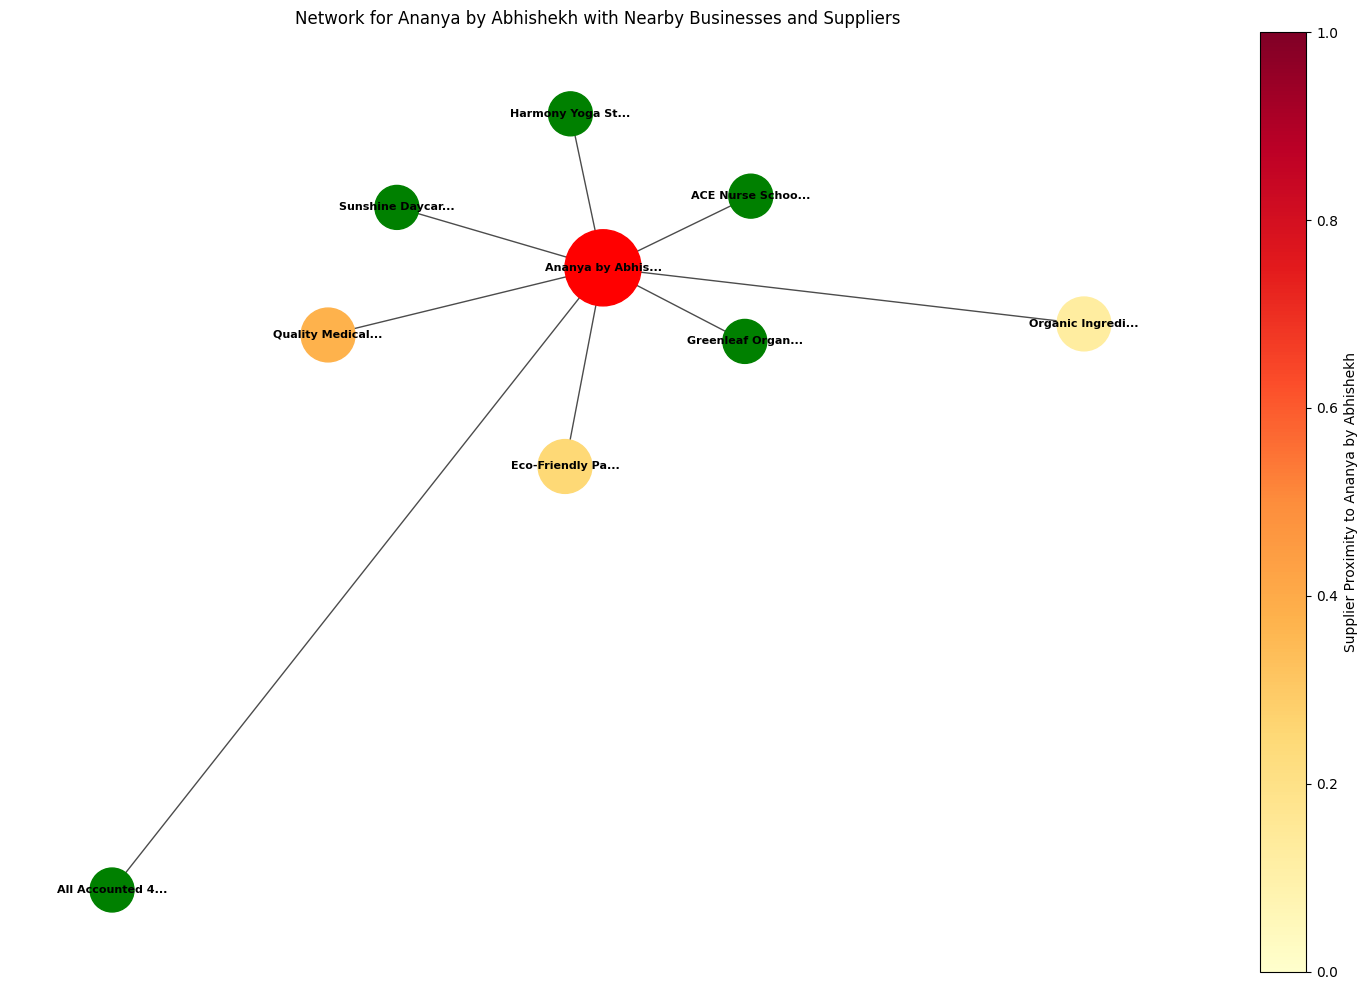

Ananya's Network:
Number of nodes: 9
Number of edges: 8

Connected businesses and suppliers:
- ACE Nurse School (Connected): Proximity = 0.88
- Greenleaf Organic Cafe (Connected): Proximity = 0.75
- Sunshine Daycare Center (Connected): Proximity = 0.62
- Harmony Yoga Studio (Connected): Proximity = 0.50
- Quality Medical Supplies (Supplier): Proximity = 0.38
- Eco-Friendly Packaging Co. (Supplier): Proximity = 0.25
- Organic Ingredients Wholesaler (Supplier): Proximity = 0.12
- All Accounted 4 Bookkeeping (Connected): Proximity = 0.00


In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

# Create a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'ACE Nurse School',
        'Greenleaf Organic Cafe',
        'Sunshine Daycare Center',
        'Harmony Yoga Studio',
        'Quality Medical Supplies',
        'Eco-Friendly Packaging Co.',
        'Organic Ingredients Wholesaler',
        'All Accounted 4 Bookkeeping'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008],
    'Type': ['Main', 'Connected', 'Connected', 'Connected', 'Connected', 'Supplier', 'Supplier', 'Supplier', 'Connected']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create Ananya's network with hypothetical nodes and suppliers
def create_ananya_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    ananya_postcode = df[df['Business Name'] == ananya]['Postcode'].values[0]
    G.add_node(ananya, color='red', size=3000, postcode=ananya_postcode)

    # Add connections and suppliers
    for _, business in df[df['Business Name'] != ananya].iterrows():
        name = business['Business Name']
        postcode = business['Postcode']
        biz_type = business['Type']
        proximity = calculate_proximity(ananya_postcode, postcode)

        if biz_type == 'Connected':
            color = 'green'
            size = 1000
            G.add_edge(ananya, name, weight=proximity)
        elif biz_type == 'Supplier':
            color = 'supplier'
            size = 1500
            G.add_edge(ananya, name, weight=proximity)

        G.add_node(name, color=color, size=size, postcode=postcode, proximity=proximity, type=biz_type)

    return G

# Create the network
G = create_ananya_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_nodes = []
supplier_colors = []

for node in G.nodes():
    if G.nodes[node]['color'] == 'red':
        node_colors.append('red')
    elif G.nodes[node]['color'] == 'supplier':
        supplier_nodes.append(node)
        supplier_colors.append(G.nodes[node]['proximity'])
    else:
        node_colors.append('green')
    node_sizes.append(G.nodes[node]['size'])

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n not in supplier_nodes],
                       node_color=node_colors,
                       node_size=[G.nodes[n]['size'] for n in G.nodes() if n not in supplier_nodes])

# Draw supplier nodes
if supplier_nodes:
    supplier_node_collection = nx.draw_networkx_nodes(G, pos,
                                            nodelist=supplier_nodes,
                                            node_color=supplier_colors,
                                            node_size=[G.nodes[n]['size'] for n in supplier_nodes],
                                            cmap=plt.cm.YlOrRd,
                                            vmin=0, vmax=1)  # Set the range for color mapping

nx.draw_networkx_edges(G, pos, width=1, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh with Nearby Businesses and Suppliers")
plt.axis('off')

# Add color bar only for suppliers
if supplier_nodes:
    plt.colorbar(supplier_node_collection, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Ananya's Network:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses and suppliers:")
for node in G.nodes():
    if node != "Ananya by Abhishekh":
        node_type = G.nodes[node]['type']
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")


# **ADDING ENCRYPTION TO CONCEAL All Accounted 4 Bookkeeping**

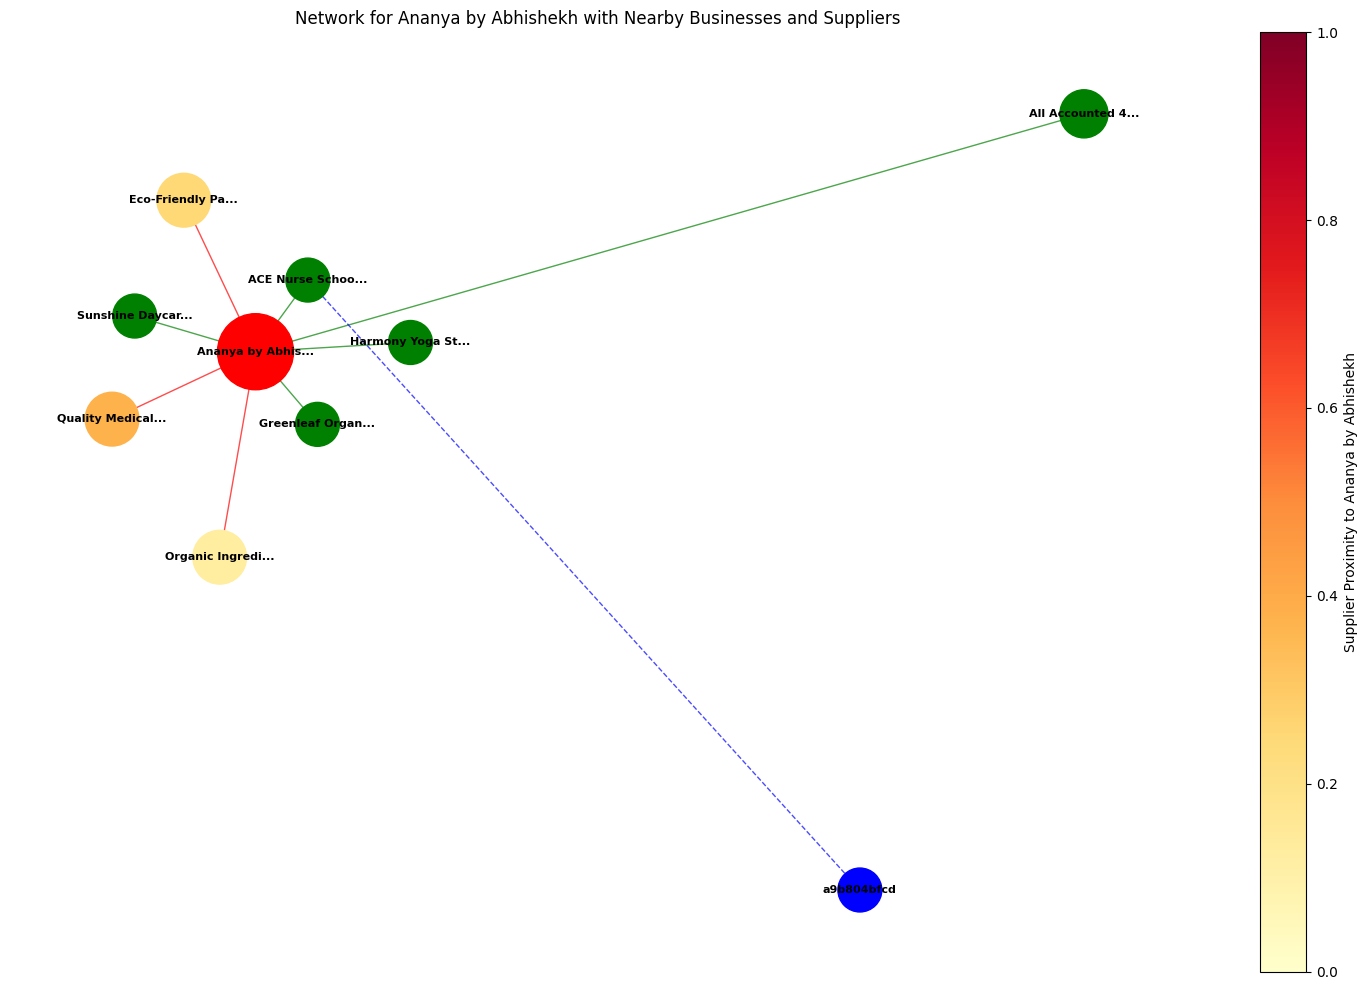

Ananya's Network:
Number of nodes: 10
Number of edges: 9

Connected businesses and suppliers:
- ACE Nurse School (Connected): Proximity = 0.88
- Greenleaf Organic Cafe (Connected): Proximity = 0.75
- Sunshine Daycare Center (Connected): Proximity = 0.62
- Harmony Yoga Studio (Connected): Proximity = 0.50
- Quality Medical Supplies (Supplier): Proximity = 0.38
- Eco-Friendly Packaging Co. (Supplier): Proximity = 0.25
- Organic Ingredients Wholesaler (Supplier): Proximity = 0.12
- All Accounted 4 Bookkeeping (Dual_Connection): Proximity = 0.00
- a9b804bfcd (Encrypted): Proximity = 0.00


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import hashlib

# Function to encrypt a string
def encrypt_name(name):
    return hashlib.md5(name.encode()).hexdigest()[:10]

# Create a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'ACE Nurse School',
        'Greenleaf Organic Cafe',
        'Sunshine Daycare Center',
        'Harmony Yoga Studio',
        'Quality Medical Supplies',
        'Eco-Friendly Packaging Co.',
        'Organic Ingredients Wholesaler',
        'All Accounted 4 Bookkeeping'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008],
    'Type': ['Main', 'Connected', 'Connected', 'Connected', 'Connected', 'Supplier', 'Supplier', 'Supplier', 'Dual_Connection']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create Ananya's network with hypothetical nodes and suppliers
def create_ananya_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    ananya_postcode = df[df['Business Name'] == ananya]['Postcode'].values[0]
    G.add_node(ananya, color='red', size=3000, postcode=ananya_postcode)

    # Add connections and suppliers
    for _, business in df[df['Business Name'] != ananya].iterrows():
        name = business['Business Name']
        postcode = business['Postcode']
        biz_type = business['Type']
        proximity = calculate_proximity(ananya_postcode, postcode)

        if biz_type == 'Connected':
            color = 'green'
            size = 1000
            G.add_edge(ananya, name, weight=proximity, color='green')
        elif biz_type == 'Supplier':
            color = 'supplier'
            size = 1500
            G.add_edge(ananya, name, weight=proximity, color='red')
        elif biz_type == 'Dual_Connection':
            color = 'green'
            size = 1200
            G.add_edge(ananya, name, weight=proximity, color='green')
            encrypted_name = encrypt_name(name)
            G.add_node(encrypted_name, color='blue', size=1000, postcode=postcode, proximity=proximity, type='Encrypted')
            G.add_edge('ACE Nurse School', encrypted_name, weight=proximity, color='blue', style='dashed')

        G.add_node(name, color=color, size=size, postcode=postcode, proximity=proximity, type=biz_type)

    return G


# Create the network
G = create_ananya_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_nodes = []
supplier_colors = []

for node in G.nodes():
    if G.nodes[node]['color'] == 'red':
        node_colors.append('red')
    elif G.nodes[node]['color'] == 'supplier':
        supplier_nodes.append(node)
        supplier_colors.append(G.nodes[node]['proximity'])
    else:
        node_colors.append(G.nodes[node]['color'])
    node_sizes.append(G.nodes[node]['size'])

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n not in supplier_nodes],
                       node_color=node_colors,
                       node_size=[G.nodes[n]['size'] for n in G.nodes() if n not in supplier_nodes])

# Draw supplier nodes
if supplier_nodes:
    supplier_node_collection = nx.draw_networkx_nodes(G, pos,
                                            nodelist=supplier_nodes,
                                            node_color=supplier_colors,
                                            node_size=[G.nodes[n]['size'] for n in supplier_nodes],
                                            cmap=plt.cm.YlOrRd,
                                            vmin=0, vmax=1)  # Set the range for color mapping

# Draw edges
edge_colors = []
edge_styles = []
for (u, v, data) in G.edges(data=True):
    if 'color' in data:
        edge_colors.append(data['color'])
    else:
        edge_colors.append('gray')
    if 'style' in data:
        edge_styles.append(data['style'])
    else:
        edge_styles.append('solid')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, style=edge_styles, width=1, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh with Nearby Businesses and Suppliers")
plt.axis('off')

# Add color bar only for suppliers
if supplier_nodes:
    plt.colorbar(supplier_node_collection, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Ananya's Network:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses and suppliers:")
for node in G.nodes():
    if node != "Ananya by Abhishekh":
        node_type = G.nodes[node]['type']
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")


# **IF ACE Nurse School's Connections and ACE Nurse School itself gives consent to visualize their network on Ananya By Abhishek's Screen**

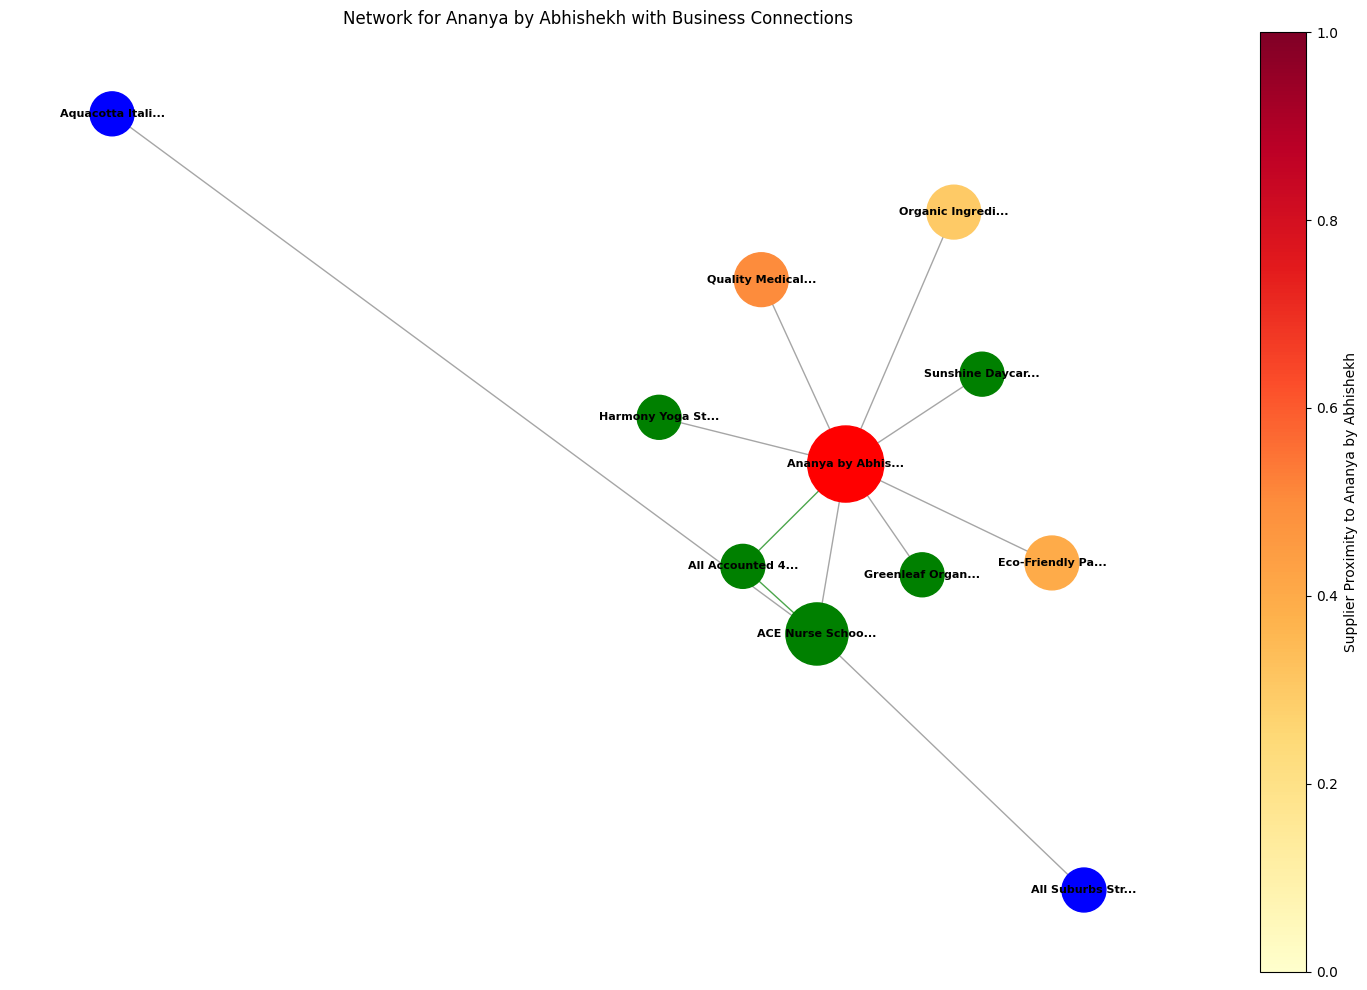

Ananya's Network:
Number of nodes: 11
Number of edges: 11

Connected businesses and suppliers:
- ACE Nurse School (Connected): Proximity = 0.90
- Greenleaf Organic Cafe (Connected): Proximity = 0.80
- Sunshine Daycare Center (Connected): Proximity = 0.70
- Harmony Yoga Studio (Connected): Proximity = 0.60
- Quality Medical Supplies (Supplier): Proximity = 0.50
- Eco-Friendly Packaging Co. (Supplier): Proximity = 0.40
- Organic Ingredients Wholesaler (Supplier): Proximity = 0.30
- All Accounted 4 Bookkeeping (Connected): Proximity = 0.20
- All Suburbs Strata Management (ACE_Connection): Proximity = 0.10
- Aquacotta Italian Restaurant (ACE_Connection): Proximity = 0.00


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'ACE Nurse School',
        'Greenleaf Organic Cafe',
        'Sunshine Daycare Center',
        'Harmony Yoga Studio',
        'Quality Medical Supplies',
        'Eco-Friendly Packaging Co.',
        'Organic Ingredients Wholesaler',
        'All Accounted 4 Bookkeeping',
        'All Suburbs Strata Management',
        'Aquacotta Italian Restaurant'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'Type': ['Main', 'Connected', 'Connected', 'Connected', 'Connected', 'Supplier', 'Supplier', 'Supplier', 'Connected', 'ACE_Connection', 'ACE_Connection']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to create Ananya's network
def create_ananya_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    ananya_postcode = df[df['Business Name'] == ananya]['Postcode'].values[0]
    G.add_node(ananya, color='red', size=3000, postcode=ananya_postcode)

    # Add connections and suppliers
    for _, business in df[df['Business Name'] != ananya].iterrows():
        name = business['Business Name']
        postcode = business['Postcode']
        biz_type = business['Type']
        proximity = calculate_proximity(ananya_postcode, postcode)

        if biz_type == 'Connected':
            color = 'green'
            size = 1000
            G.add_edge(ananya, name, weight=proximity)
        elif biz_type == 'Supplier':
            color = 'orange'
            size = 1500
            G.add_edge(ananya, name, weight=proximity)
        elif biz_type == 'ACE_Connection':
            color = 'blue'
            size = 1000
            G.add_edge('ACE Nurse School', name, weight=proximity)

        G.add_node(name, color=color, size=size, postcode=postcode, proximity=proximity, type=biz_type)

    # Add connections for ACE Nurse School and All Accounted 4 Bookkeeping
    G.add_node('ACE Nurse School', color='green', size=2000, postcode=df[df['Business Name'] == 'ACE Nurse School']['Postcode'].values[0])
    G.add_edge(ananya, 'All Accounted 4 Bookkeeping', weight=1, color='green')
    G.add_edge('ACE Nurse School', 'All Accounted 4 Bookkeeping', weight=1, color='green')

    return G

# Create the network
G = create_ananya_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_nodes = []
supplier_colors = []

for node in G.nodes():
    if G.nodes[node]['color'] == 'orange':  # Supplier
        supplier_nodes.append(node)
        supplier_colors.append(G.nodes[node]['proximity'])
    else:
        node_colors.append(G.nodes[node]['color'])
    node_sizes.append(G.nodes[node]['size'])

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n not in supplier_nodes],
                       node_color=node_colors,
                       node_size=[G.nodes[n]['size'] for n in G.nodes() if n not in supplier_nodes])

# Draw supplier nodes
if supplier_nodes:
    supplier_node_collection = nx.draw_networkx_nodes(G, pos,
                                            nodelist=supplier_nodes,
                                            node_color=supplier_colors,
                                            node_size=[G.nodes[n]['size'] for n in supplier_nodes],
                                            cmap=plt.cm.YlOrRd,
                                            vmin=0, vmax=1)  # Set the range for color mapping

# Draw edges
edge_colors = [G[u][v].get('color', 'gray') for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh with Business Connections")
plt.axis('off')

# Add color bar for suppliers
if supplier_nodes:
    plt.colorbar(supplier_node_collection, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Ananya's Network:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nConnected businesses and suppliers:")
for node in G.nodes():
    if node != "Ananya by Abhishekh":
        node_type = G.nodes[node]['type']
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")


# **Network for Ananya by Abhishekh with ACE Nurse School and Encrypted Suppliers (Suppliers not giving consent)**

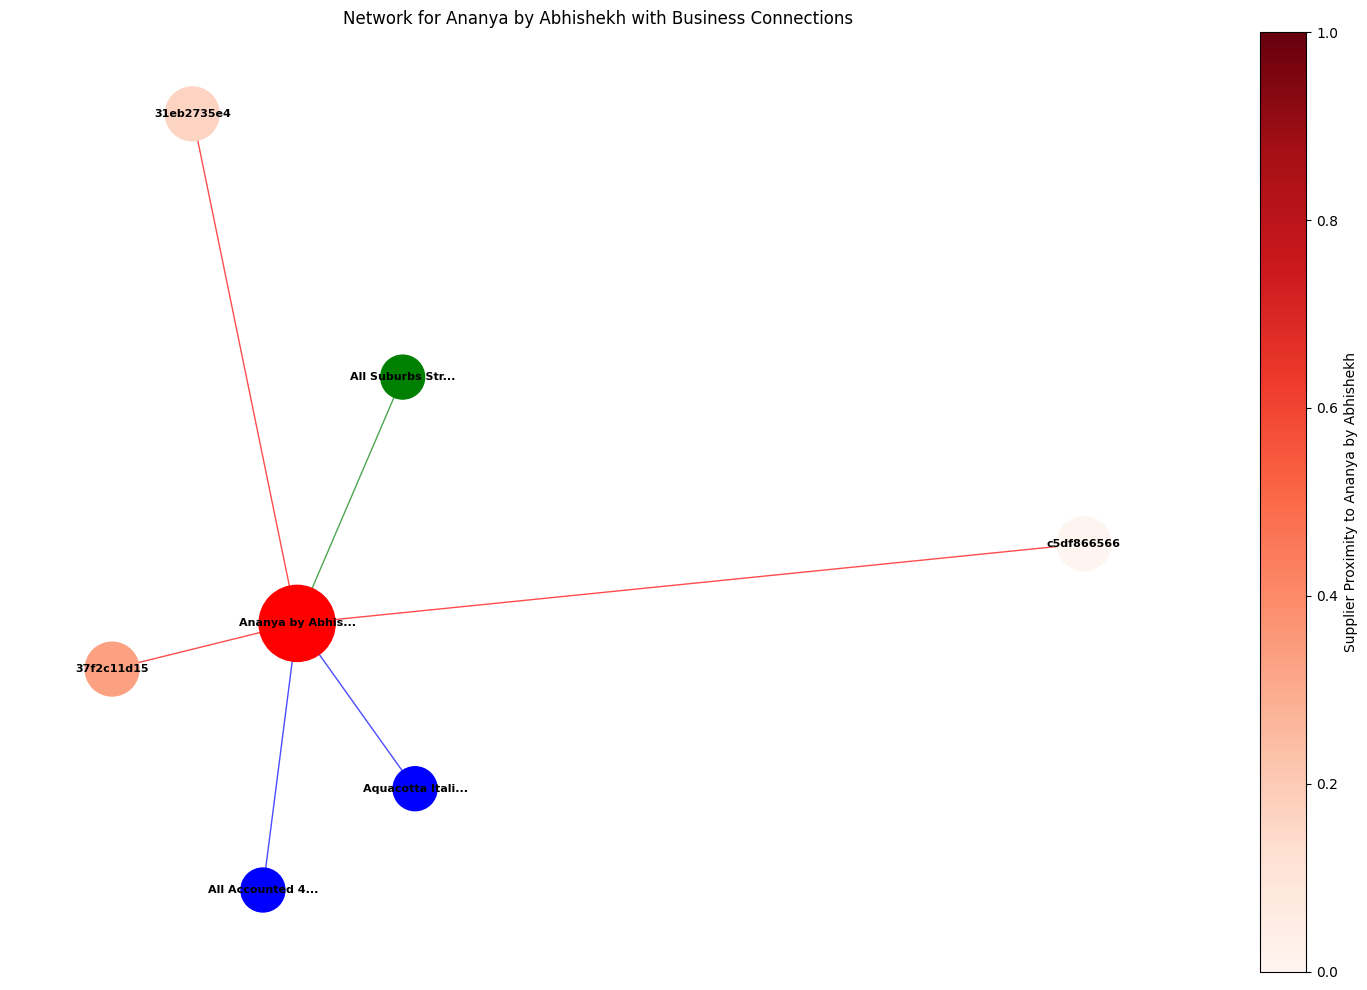

Network Information:
Number of nodes: 7
Number of edges: 6

Nodes:
- Ananya by Abhishekh (Main)
- All Accounted 4 Bookkeeping (ACE_Connection)
- Aquacotta Italian Restaurant (ACE_Connection)
- All Suburbs Strata Management (Connected)
- 37f2c11d15 (Supplier): Proximity = 0.33
- 31eb2735e4 (Supplier): Proximity = 0.17
- c5df866566 (Supplier): Proximity = 0.00


In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hashlib

# Create a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'All Accounted 4 Bookkeeping',
        'Aquacotta Italian Restaurant',
        'All Suburbs Strata Management',
        'Supplier 1',
        'Supplier 2',
        'Supplier 3'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004, 1005, 1006],
    'Type': ['Main', 'ACE_Connection', 'ACE_Connection', 'Connected', 'Supplier', 'Supplier', 'Supplier']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate proximity based on postcode
def calculate_proximity(postcode1, postcode2):
    return 1 - abs(postcode1 - postcode2) / max(df['Postcode'].max() - df['Postcode'].min(), 1)

# Function to encrypt supplier names using ahslib (simulated with hashlib)
def encrypt_supplier(name):
    return hashlib.sha256(name.encode()).hexdigest()[:10]

# Function to create the network
def create_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    ananya_postcode = df[df['Business Name'] == ananya]['Postcode'].values[0]
    G.add_node(ananya, color='red', size=3000, postcode=ananya_postcode, type='Main')

    # Add connections and suppliers
    for _, business in df.iterrows():
        name = business['Business Name']
        postcode = business['Postcode']
        biz_type = business['Type']

        if name != ananya:
            proximity = calculate_proximity(ananya_postcode, postcode)
            if biz_type == 'Supplier':
                encrypted_name = encrypt_supplier(name)
                color = 'red'
                size = 1500
                G.add_edge(ananya, encrypted_name, weight=proximity, color='red')
                G.add_node(encrypted_name, color=color, size=size, postcode=postcode, type=biz_type, proximity=proximity)
            elif biz_type == 'ACE_Connection':
                color = 'blue'
                size = 1000
                G.add_edge(ananya, name, weight=proximity, color='blue')
                G.add_node(name, color=color, size=size, postcode=postcode, type=biz_type, proximity=proximity)
            elif biz_type == 'Connected':
                color = 'green'
                size = 1000
                G.add_edge(ananya, name, weight=proximity, color='green')
                G.add_node(name, color=color, size=size, postcode=postcode, type=biz_type, proximity=proximity)

    return G

# Create the network
G = create_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_nodes = []
supplier_colors = []

for node in G.nodes():
    if G.nodes[node]['type'] == 'Supplier':
        supplier_nodes.append(node)
        supplier_colors.append(G.nodes[node]['proximity'])
    else:
        node_colors.append(G.nodes[node]['color'])
    node_sizes.append(G.nodes[node]['size'])

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n not in supplier_nodes],
                       node_color=node_colors,
                       node_size=[G.nodes[n]['size'] for n in G.nodes() if n not in supplier_nodes])

# Draw supplier nodes
if supplier_nodes:
    supplier_node_collection = nx.draw_networkx_nodes(G, pos,
                                            nodelist=supplier_nodes,
                                            node_color=supplier_colors,
                                            node_size=[G.nodes[n]['size'] for n in supplier_nodes],
                                            cmap=plt.cm.Reds,
                                            vmin=0, vmax=1)  # Set the range for color mapping

# Draw edges
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh with Business Connections")
plt.axis('off')

# Add color bar for suppliers
if supplier_nodes:
    plt.colorbar(supplier_node_collection, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Network Information:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nNodes:")
for node in G.nodes():
    node_type = G.nodes[node]['type']
    if node_type == 'Supplier':
        proximity = G.nodes[node]['proximity']
        print(f"- {node} ({node_type}): Proximity = {proximity:.2f}")
    else:
        print(f"- {node} ({node_type})")

# **MERGING Aquacotta Italian Restaurant and All Suburbs Strata Management so that All Suburbs Strata Management is hidden**

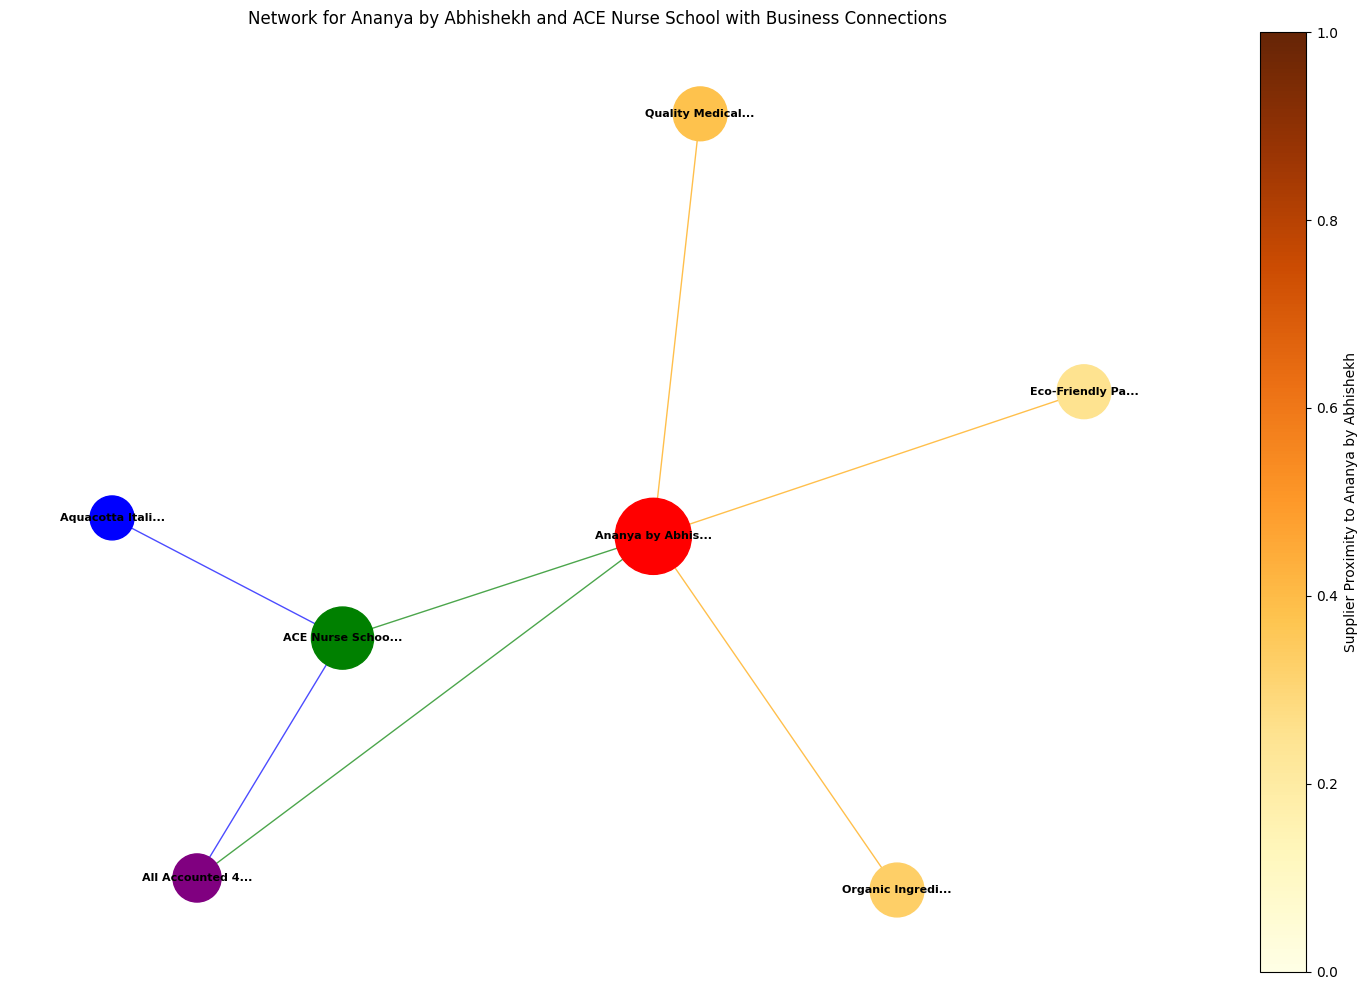

Network Information:
Number of nodes: 7
Number of edges: 7

Nodes:
- Ananya by Abhishekh (Main)
- ACE Nurse School (Connected)
- All Accounted 4 Bookkeeping (Dual_Connection)
- Aquacotta Italian Restaurant (ACE_Connection)
- Quality Medical Supplies: Proximity = 0.38
- Eco-Friendly Packaging Co.: Proximity = 0.25
- Organic Ingredients Wholesaler: Proximity = 0.33


In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a hypothetical dataset
data = {
    'Business Name': [
        'Ananya by Abhishekh',
        'ACE Nurse School',
        'All Accounted 4 Bookkeeping',
        'Aquacotta Italian Restaurant',  # Merged node
        'All Suburbs Strata Management',  # Merged node
        'Quality Medical Supplies',
        'Eco-Friendly Packaging Co.',
        'Organic Ingredients Wholesaler'
    ],
    'Postcode': [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007],
    'Type': ['Main', 'Connected', 'Dual_Connection', 'ACE_Connection', 'ACE_Connection', 'Supplier', 'Supplier', 'Supplier'],
    'Proximity': [0, 0, 0, 0, 0, 0.38, 0.25, 0.33]  # Added proximity values
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to create the network
def create_network(df):
    G = nx.Graph()

    # Add Ananya as the main node
    ananya = 'Ananya by Abhishekh'
    G.add_node(ananya, color='red', size=3000, type='Main')

    # Add ACE Nurse School
    ace = 'ACE Nurse School'
    G.add_node(ace, color='green', size=2000, type='Connected')

    # Add connection between Ananya and ACE Nurse School
    G.add_edge(ananya, ace, weight=1, color='green')

    # Add connections and suppliers
    for _, business in df.iterrows():
        name = business['Business Name']
        biz_type = business['Type']
        proximity = business['Proximity']

        # Merge Aquacotta and All Suburbs into Aquacotta
        if name == 'All Suburbs Strata Management':
            name = 'Aquacotta Italian Restaurant'  # Use the merged name

        if name not in [ananya, ace]:
            if biz_type == 'Supplier':
                color = 'orange'
                size = 1500
                G.add_edge(ananya, name, weight=proximity, color=color)
                G.add_node(name, color=color, size=size, type=biz_type, proximity=proximity)
            elif biz_type == 'ACE_Connection':
                color = 'blue'
                size = 1000
                G.add_edge(ace, name, weight=1, color=color)
                G.add_node(name, color=color, size=size, type=biz_type)
            elif biz_type == 'Dual_Connection':
                color = 'purple'
                size = 1200
                G.add_edge(ananya, name, weight=proximity, color='green')
                G.add_edge(ace, name, weight=1, color='blue')
                G.add_node(name, color=color, size=size, type=biz_type)

    return G

# Create the network
G = create_network(df)

# Prepare node colors and sizes for visualization
node_colors = []
node_sizes = []
supplier_nodes = []
supplier_colors = []

for node in G.nodes():
    if G.nodes[node]['type'] == 'Supplier':
        supplier_nodes.append(node)
        supplier_colors.append(G.nodes[node]['proximity'])
    else:
        node_colors.append(G.nodes[node]['color'])
    node_sizes.append(G.nodes[node]['size'])

# Visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

# Draw non-supplier nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n not in supplier_nodes],
                       node_color=node_colors,
                       node_size=[G.nodes[n]['size'] for n in G.nodes() if n not in supplier_nodes])

# Draw supplier nodes
if supplier_nodes:
    supplier_node_collection = nx.draw_networkx_nodes(G, pos,
                                            nodelist=supplier_nodes,
                                            node_color=supplier_colors,
                                            node_size=[G.nodes[n]['size'] for n in supplier_nodes],
                                            cmap=plt.cm.YlOrBr,
                                            vmin=0, vmax=1)  # Set the range for color mapping

# Draw edges
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1, alpha=0.7)

# Add labels
labels = {node: node[:15] + '...' if len(node) > 15 else node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')

plt.title("Network for Ananya by Abhishekh and ACE Nurse School with Business Connections")
plt.axis('off')

# Add color bar for suppliers
if supplier_nodes:
    plt.colorbar(supplier_node_collection, label='Supplier Proximity to Ananya by Abhishekh')

plt.tight_layout()
plt.show()

# Print network information
print("Network Information:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("\nNodes:")
for node in G.nodes():
    node_type = G.nodes[node]['type']
    if node_type == 'Supplier':
        proximity = G.nodes[node]['proximity']
        print(f"- {node}: Proximity = {proximity:.2f}")
    else:
        print(f"- {node} ({node_type})")